# Intro to Python
## Assignment 4: For Loops, Advanced Conditionals

## Answers

**Date:** July 23 – July 29, 2021<br>
**Programmer:** *Fill out name*

### 1. Write a function in a `.py` file that you import into your notebook that can add all `int` values in a list and print the cumulative total.

In [ ]:
def running_total(input_list):
  running_total = 0
  for item in input_list:
    if type(item) == int:
      running_total += item
  print('total:', running_total)

running_total([5, 3, 8, 'hi', 'no', 12])

total: 28


### 2. Navigate to the [Aging, Dementia, and TBI Study](https://aging.brain-map.org/download/index). Download the summary information `DonorInformation.csv` from the link: *De-identified clinical information (including Alzheimer’s disease, dementia, and TBI diagnoses) for all donors included in the study.)* and generate a pandas DataFrame from the data.

Hint: Look up the [documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) for reading csvs into pandas and make sure you assign the appropriate delimiter.

In [ ]:
import pandas as pd
import numpy as np

donor_df = pd.read_csv('DonorInformation.csv')
donor_df

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,309335458,H14.09.021,88,M,N,12,18,> 1 hr,0,1,Alzheimer's Disease Type,21,Probable Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,1,1
103,309335462,H14.09.025,84,M,N,16,23,10 min - 1 hr,0,2,Alzheimer's Disease Type,40,Probable Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,0,0
104,309335454,H14.09.017,79,M,N,16,13,< 10 sec,2,3,No Dementia,44,No Dementia,Y,White,Not Hispanic,No Dementia,3,2
105,309335486,H14.09.049,95-99,M,N,21,18,3-5 min,1,1,No Dementia,12,No Dementia,Y,White,Not Hispanic,No Dementia,3,1


In [ ]:
import pandas as pd
import numpy as np

donor_df = pd.read_csv('DonorInformation.csv', delimiter=',')
donor_df.head(10)

,donor_id,name,age,sex,apo_e4_allele,education_years,age_at_first_tbi,longest_loc_duration,cerad,num_tbi_w_loc,dsm_iv_clinical_diagnosis,control_set,nincds_arda_diagnosis,ever_tbi_w_loc,race,hispanic,act_demented,braak,nia_reagan
0,326765665,H14.09.078,87,M,N,16,0,Unknown or N/A,0,0,No Dementia,31,No Dementia,N,White,Not Hispanic,No Dementia,1,1
1,326765656,H14.09.069,95-99,M,N,17,12,1-2 min,2,1,No Dementia,26,No Dementia,Y,White,Not Hispanic,No Dementia,5,2
2,326765654,H14.09.067,85,M,Y,10,72,< 10 sec,3,1,Vascular,25,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,4,2
3,467056391,H15.09.103,90-94,F,N,11,87,< 10 sec,0,1,No Dementia,52,No Dementia,Y,White,Not Hispanic,No Dementia,4,0
4,309335447,H14.09.010,100+,M,Y,16,0,Unknown or N/A,3,0,Alzheimer's Disease Type,28,Possible Alzheimer'S Disease,N,White,Not Hispanic,Dementia,4,2
5,309335457,H14.09.020,95-99,F,N,18,0,Unknown or N/A,2,0,No Dementia,1,No Dementia,N,Non-white,Not Hispanic,No Dementia,3,2
6,326765676,H14.09.089,89,F,NaN,12,13,10 min - 1 hr,3,1,Vascular,43,"Dementia, Type Unknown",Y,White,Not Hispanic,Dementia,6,3
7,326765681,H14.09.094,78,M,N,18,0,Unknown or N/A,1,0,No Dementia,46,No Dementia,N,White,Not Hispanic,No Dementia,2,1
8,326765648,H14.09.061,89,F,N,16,6,< 10 sec,1,1,Multiple Etiologies,22,Possible Alzheimer'S Disease,Y,White,Not Hispanic,Dementia,2,1
9,326765657,H14.09.070,95-99,M,N,16,0,Unknown or N/A,0,0,No Dementia,26,No Dementia,N,White,Not Hispanic,No Dementia,2,1


What is the average age for all patients included in the dataset?

**Hint:** Look at the first 20 rows using the `df.head(20)` to see any discrepancies in data types. For patients with ranges provided rather than single numbers, write a function that approximates.

In [ ]:
def cleaning_age(age):
  if '-' in age:
    age_split = age.split('-')
    age_avg = (int(age_split[0]) + int(age_split[1]))/2
  elif '+' in age:
    # do something
    print(age_avg)

donor_df['age'].apply(cleaning_age)

97.0
92.0
97.0
97.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
92.0
97.0
97.0
92.0
92.0
92.0
92.0
97.0
92.0
92.0
92.0
97.0
92.0
92.0
97.0
97.0
97.0
92.0
92.0
92.0
97.0
97.0
92.0
92.0
92.0
97.0
92.0
97.0
92.0
92.0
97.0
92.0


0      None
1      None
2      None
3      None
4      None
       ... 
102    None
103    None
104    None
105    None
106    None
Name: age, Length: 107, dtype: object

In [ ]:
def age_approximate(age):
  if '-' in age:
    age_split = age.split('-')
    low = int(age_split[0])
    high = int(age_split[1])
    return(np.mean([low, high]))
  elif '+' in age:
    age_split = age.split('+')
    return(int(age_split[0])+5)
  else:
    return(int(age))

105

In [ ]:
donor_df['age_approximate'] = donor_df['age'].apply(age_approximate)
donor_df['age_approximate'].mean()

89.45794392523365

Plot the average year by dsm clinical diagnosis?

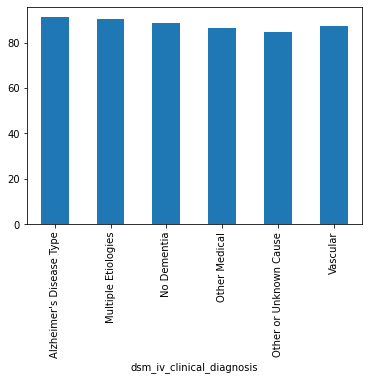

In [ ]:
donor_df.groupby('dsm_iv_clinical_diagnosis')['age_approximate'].mean().plot(kind='bar')

Create a new DataFrame that only contains patients that have dementia (filtering out patients with DSM IV - No Dementia). For those patients who had a traumatic brain injury (tbi not equal to 0), what was the average age when they had a tbi?

In [ ]:
dementia_df = donor_df[donor_df['dsm_iv_clinical_diagnosis'] != 'No Dementia']
tbi_df = dementia_df[dementia_df['age_at_first_tbi'] != 0]
tbi_df['age_at_first_tbi'].mean()

39.81481481481482

### 3. Write a function that takes in two arguments, `value` and `currency`, and utilizes a dictionary to print the exchange rate of different currencies all into USD. Round the final value to 2 decimal places. 

**Hint:** Make sure to check to see whether the currency provided is included in `dict.keys()`

The current exchange rate is:
* USD = 1
* Euro = 0.849
* Pound = 0.726
* CAD = 1.257
* Rupee = 74.461

In [ ]:
exchange_rate = {}
exchange_rate['USD'] = 1
exchange_rate['Euro'] = 0.849
exchange_rate['Pound'] = 0.726
exchange_rate['CAD'] = 1.257
exchange_rate['Rupee'] = 74.461

In [ ]:
def exchange_converter(value, currency):
  if currency in exchange_rate.keys():
    converted_value = round(value * exchange_rate[currency], 2)
    print(currency, 'to USD: $', converted_value)
  else:
    print('Currency missing from dictionary')

exchange_converter(20, 'Pound')

Pound to USD: $ 14.52
